# Ejercicios : Problemas de Optimización usando Métodos de primer orden
<a href="https://colab.research.google.com/github/milocortes/mod_04_concentracion/blob/ccm-2024/src/notebooks/python/metodos_primer_orden.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Métodos de primer orden

Todos los métodos de iteración requieren especificar un punto de inicio $\boldsymbol{\theta}_{0}$. En cada iteración $t$ realizan una actualización siguiendo la siguiente regla:

$$
\begin{equation}
	\boldsymbol{\theta}_{t+1} = \boldsymbol{\theta}_{t} + \rho_t \boldsymbol{d}_{t}
\end{equation}
$$

donde $\rho_t$ se le conoce como **tamaño de paso** o **tasa de aprendizaje**, y $\boldsymbol{d}_t$ es una **dirección de descenso**. 

### Steepest Descent
Cuando la dirección de descenso es igual al negativo del gradiente ($\textit{i.e}$ $\boldsymbol{d}_t = - \boldsymbol{g}_t $)(Recuerda que el gradiente apunta en la dirección de máximo incremento en $f$, por eso el negativo apunta en la dirección de máxima disminución), la dirección se le conoce como de **steepest descent**.

$$
\begin{equation}
	\boldsymbol{\theta}_{t+1} = \boldsymbol{\theta}_{t} - \rho_t \boldsymbol{g}_{t}
\end{equation}
$$

Utilizando una tasa de aprendizaje constante $\rho_t = \rho$, la regla de actualización es:

$$
\begin{equation}
	\boldsymbol{\theta}_{t+1} = \boldsymbol{\theta}_{t} - \rho \boldsymbol{g}_{t}
\end{equation}
$$

### Momentum

Sí agregamos el término de *momentum* $\boldsymbol{m_t}$ al método de steepest descent el cuál tiene por ecuación de actualización
$$
\begin{equation}
    \boldsymbol{\theta}_{t+1} = \boldsymbol{\theta}_{t} - \rho \boldsymbol{g}_{t}
\end{equation}
$$
El *momentum* es incorporado de la siguiente manera:
$$
 \begin{equation}
    \boldsymbol{m}_{t+1} = \beta\boldsymbol{m}_{t} - \boldsymbol{g}_{t}
\end{equation}
$$	
$$
 \begin{equation}
    \boldsymbol{\theta}_{t+1} = \boldsymbol{\theta}_{t} - \rho \boldsymbol{m}_{t+1}
\end{equation}
$$
Un valor típico de $\beta$ es 0.9. Para $\beta=0$, el método se reduce a steepest descent. Podemos pensar$\beta$ como un factor de escala o e intensidad de inercia. Inicialmente, $\boldsymbol{m}_{t}=0$.

### Momentum de Nesterov

El método de Nesterov  definido en el formato estándar de *momentum* es el siguiente:
$$
\begin{equation}
    \boldsymbol{m}_{t+1} = \beta\boldsymbol{m}_{t} - \rho\nabla f(\boldsymbol{\theta}_{t} + \beta \boldsymbol{m}_{t})
\end{equation}
$$
$$
 \begin{equation}
    \boldsymbol{\theta}_{t+1} = \boldsymbol{\theta}_{t} + \boldsymbol{m}_{t+1}
\end{equation}
$$

### Adam

Kigma y Ba (2014) propusieron el método *Adam* (Adaptative moment estimation). El método usa el cuadrado del gradiente así como un término de *momentum*. Las reglas de actualización son las siguientes:
$$
\begin{gather*} 
    \boldsymbol{m}_t = \beta_1 \boldsymbol{m}_{t-1} + \beta_1 (1-\beta_1)\boldsymbol{g}_t \\
    \boldsymbol{s}_t = \beta_2 \boldsymbol{s}_{t-1} + \beta_2 (1-\beta_1)\boldsymbol{g}^2_t \\
    \boldsymbol{\tilde{m}}_t = \dfrac{\boldsymbol{m}_t }{1-\beta^t_1}\\
    \boldsymbol{\tilde{s}}_t = \dfrac{\boldsymbol{s}_t }{1-\beta^t_2}\\
    \boldsymbol{\theta}_{t+1} = \boldsymbol{\theta}_{t} - \rho \dfrac{1}{\sqrt{\boldsymbol{\tilde{s}}_t} + \epsilon} \boldsymbol{\tilde{m}}_t
\end{gather*}
$$
    
Los valores estándar de los parámetros son $\beta_1=0.9$, $\beta_2=0.999$ y $\epsilon=10^{-6}$. Si definimos $\beta_1=0$ y quitamos la corrección del sesgo, obtenemos el método RMSprop (Hinton, et al., 2012) que no utiliza *momentum*. 
Se suele utilizar una tasa de aprendizaje constante igual a $\rho=0.001$.



## Definición de Clases

![OOP:Herencia](herencia.jpeg)

In [1]:
from typing import Callable
import numpy as np

class PrimerOrden:
    """
    La clase PrimerOrden es la clase padre de los optimizadores de primer orden.
    
        La clase incorpora los elementos imprescindibles de cualquier método de 
        optimización de primer orden : 
            * Valor inicial, 
            * Ciclo iterativo,
            * Tasa de aprendizaje,
            * Función a minimizar,
            * Derivada de la función a derivar

        Estos elementos son heredados a las clases hijo que, para el caso de este paquete, 
        corresponden a los siguientes métodos de optimización de primer orden:
            * Steepest descent
            * Momentum
            * Momentum Nesterov
            * Adam

    Argumentos de inicializacion
    _________________________________________________________________________________

        - f         :   Función a minimizar
        - df        :   Derivada de la función a minimizar
        - rho       :   Tasa de aprendizaje
        - x         :   Valor inicial de la búsqueda
        - maxiter   :   Cantidad máxima de iteraciones
        - args      :   Tupla que incorpora argumentos adicionales para el gradiente

    """

    def __init__(self, f : Callable, df : Callable, rho : float, x : np.array, maxiter : int , args = ()):
        self.f = f
        self.df = df 
        self.rho = rho 
        self.x = x 
        self.maxiter = maxiter
        self.x0 = x
        self.x_records = []
        self.args = args

    def itera(self):
        """
        El método itera() ejecuta el algoritmo iterativo la cantidad de iteraciones máximas
        definida por el usuario.
        """

        ## Iteramos el algoritmo 
        for it in range(self.maxiter):
            ## El método actualiza() utiliza la regla de actualización particular a cada método de optimización         
            self.actualiza(it)

    def optimiza(self) -> np.array:
        """    
        El método optimiza() ejecuta la iteración del algoritmo y regresa el valor
            arreglo de x que minimiza la función
        """

        ## Reiniciamos los valores iniciales
        self.x = self.x0
        self.x_records = []

        self.itera()

        return self.x

class Steepest(PrimerOrden):
    """
    La clase Steepest hereda la implementación de la clase padre PrimerOrden. 
        La clase Steepest implementa la regla de actualización del método Steepest Descent

    NOTA: La clase no necesita argumentos de inicialización dado que toda la información 
        necesitada por el método está en los argumentos de inicialización de la clase padre
        
    """

    def actualiza(self, it : int):
        """
        El método actualiza() implementa la regla de actualización particular al método Steepest Descent
        """
        self.x_records.append(self.x)
        self.x = self.x - self.rho*self.df(self.x, *self.args)

class Momentum(PrimerOrden):
    """
    La clase Momentum hereda la implementación de la clase padre PrimerOrden. 
        La clase SteepMomentumest implementa la regla de actualización del método de Momentum
        
    Argumentos de inicializacion
    _________________________________________________________________________________

        - m         :   Término de momentum
        - beta      :   Factor de escala o de intensidad de inercia
    
    """

    def __init__(self, m : np.array, beta : float, f : Callable, df : Callable, rho : float, x : np.array, maxiter : int, args = ()):
        super().__init__(f, df, rho, x, maxiter, args)
        self.m = m 
        self.beta = beta
        

    def actualiza(self, it : int):
        """
        El método actualiza() implementa la regla de actualización particular al método de Momentum
        """
        self.x_records.append(self.x)

        self.m = self.beta*self.m + self.df(self.x, *self.args)
        self.x = self.x - self.rho*self.m

class MomentumNesterov(PrimerOrden):
    """
    La clase MomentumNesterov hereda la implementación de la clase padre PrimerOrden. 
        La clase MomentumNesterov implementa la regla de actualización del método de Momentum Nesterov
        
    Argumentos de inicializacion
    _________________________________________________________________________________

        - m         :   Término de momentum
        - beta      :   Factor de escala o de intensidad de inercia
    
    """

    def __init__(self, m : np.array, beta : float, f : Callable, df : Callable, rho : float, x : np.array, maxiter : int, args = ()):
        super().__init__(f, df, rho, x, maxiter, args)
        self.m = m 
        self.beta = beta
        

    def actualiza(self, it : int):
        """
        El método actualiza() implementa la regla de actualización particular al método de Momentum
        """
        
        self.x_records.append(self.x)

        self.m = self.beta*self.m - self.rho*self.df(self.x + self.beta*self.m, *self.args)
        self.x = self.x + self.m

class Adam(PrimerOrden):
    """
    La clase Adam hereda la implementación de la clase padre PrimerOrden. 
        La clase Adam implementa la regla de actualización del método de Adam.
        
    Argumentos de inicializacion
    _________________________________________________________________________________

        - m             :   Término de momentum del gradiente
        - s             :   Término de momentum del gradiente al cuadrado
        - beta_uno      :   Factor de ponderación para el cálculo del promedio móvil del gradiente
        - beta_dos      :   Factor de ponderación para el cálculo del promedio móvil del cuadrado del gradiente
        - epsilon       :   Término agregado al denominador para mejorar la estabilidad numérica
    
    """

    
    def __init__(self, m : np.array, s : np.array, beta_uno : float, beta_dos : float, epsilon : float, f : Callable, df : Callable, rho : float, x : np.array, maxiter : int, args = ()):
        super().__init__(f, df, rho, x, maxiter, args)
        self.m = m 
        self.s = s
        self.beta_uno = beta_uno
        self.beta_dos = beta_dos 
        self.epsilon  = epsilon
        self.m_tilde = None
        self.s_tilde = None
    
    def actualiza(self, it : int):
        """
        El método actualiza() implementa la regla de actualización particular al método de Momentum
        """
        self.x_records.append(self.x)

        self.m = self.beta_uno*self.m + self.beta_uno*(1-self.beta_uno)*self.df(self.x, *self.args)
        self.s = self.beta_dos*self.s + self.beta_dos*(1-self.beta_dos)*self.df(self.x, *self.args)**2

        self.m_tilde = self.m/(1 - (self.beta_uno**(it+1) ))
        self.s_tilde = self.s/(1 - (self.beta_dos**(it+1) ))

        self.x = self.x - self.rho*(1/(np.sqrt(self.s_tilde) + self.epsilon))*self.m_tilde


**Si no terminaste de copiar los algoritmos, instálalos del repositorio**:

* https://github.com/milocortes/algo_optim_mod04

Ejecuta la siguiente instrucción


In [2]:
!pip install git+https://github.com/milocortes/algo_optim_mod04.git@main

In [3]:
# Función a minimizar
import numpy as np 
from algo_optim_mod04.algoritmos_primer_orden import Steepest, Momentum, MomentumNesterov, Adam

def f(X : np.array):
    x,y = X
    return 6*x**2 + 40*y**2 - 12*x - 30*y + 3

# Función del gradiente 
def gradiente(X : np.array):
    x, y = X
    dx = 12*x - 12
    dy = 80*y - 30
    return np.array([dx,dy])


## Probamos la clase Steepest
optim_steepest = Steepest(
                        f,          # Función a minimizar
                        gradiente,         # Derivada de la función a minimizar
                        rho = 0.02,  # Tasa de aprendizaje
                        x = np.array([-0.5, 2.9]), # Punto inicial
                        maxiter = 100, # Iteraciones máximas
                        )

optim_steepest.optimiza()                    

array([1.   , 0.375])

In [4]:
## Probamos la clase Momentum
optim_momentum = Momentum(
                        f = f,          # Función a minimizar
                        df = gradiente,         # Derivada de la función a minimizar
                        rho = 0.02,  # Tasa de aprendizaje
                        x = np.array([-0.5, 2.9]), # Punto inicial
                        maxiter = 100,    # Iteraciones máximas
                        m = np.zeros(2), # Inicialmente el momentum es igual a un arreglo igual a 0
                        beta = 0.75      # Factor de inercia
                        )

optim_momentum.optimiza() 

array([0.99999948, 0.37499972])

In [5]:
## Probamos la clase Momentum Nesterov
optim_momentum_nesterov = MomentumNesterov(
                        f = f,          # Función a minimizar
                        df = gradiente,         # Derivada de la función a minimizar
                        rho = 0.0012,  # Tasa de aprendizaje
                        x = np.array([-0.5, 2.9]), # Punto inicial
                        maxiter = 100,    # Iteraciones máximas
                        m = np.zeros(2), # Inicialmente el momentum es igual a un arreglo igual a 0
                        beta = 0.85      # Factor de inercia
                        )

optim_momentum_nesterov.optimiza() 

array([1.00008446, 0.37500182])

In [6]:
## Probamos la clase Adam
optim_adam = Adam(
                    f = f,          # Función a minimizar
                    df = gradiente,         # Derivada de la función a minimizar
                    rho = 0.3,  # Tasa de aprendizaje
                    x = np.array([-0.5, 2.9]), # Punto inicial
                    maxiter = 100,    # Iteraciones máximas
                    m = np.zeros(2), # Inicialmente el momentum del gradiente es igual a un arreglo igual a 0
                    s = np.zeros(2), # Inicialmente el momentum del gradiente al cuadrado es igual a un arreglo igual a 0
                    beta_uno = 0.75,     # Factor de ponderación para el cálculo del promedio móvil del gradiente
                    beta_dos = 0.999,     # Factor de ponderación para el cálculo del promedio móvil del cuadrado del gradiente
                    epsilon = 10**-6    # Término agregado al denominador para mejorar la estabilidad numérica
                    )

optim_adam.optimiza() 


array([0.99999938, 0.37500122])

## Resolución de problemas de optimización con algoritmos de primer orden

### Libro : Introduction to Computational Economics Using Fortran 
#### Capítulo 3. Numerical Solution Methods
![Introduction to Computational Economics Using Fortran](compu_fortran.jpg)

### Ejercicio 2.4

Considera el siguiente problema de optimización intertemporal de los hogares: La función de utilidad de los hogares está dada por

$$
\begin{equation}
    U(c_1,c_2,c_3) = \sum_{i=1}^3 \beta^{i-1} u(c_i)\qquad \text{con} \qquad u(c_i) = \dfrac{c_i^{1-\frac{1}{\gamma}}}{1 - \frac{1}{\gamma}}
\end{equation}
$$

donde $c_i$ define el consumo en el periodo $i$ de vida, $\beta$ denota la tasa de descuento y $\gamma$ es la elasticidad de sustitución intertemporal.

Asume que los hogares reciben ingreso laboral $w$ en los primeros dos periodos y consumen todos sus ahorros en el tercer periodo, de manera que la restricción presupuestaria queda definida como:

$$
\begin{equation}
    \sum_{i=1}^{3} \dfrac{c_i}{(1+r)^{i-1}} = \sum_{i=1}^{2} \dfrac{w}{(1+r)^{i-1}}
\end{equation}
$$

donde $r$ es la tasa de interés.

Resuelve los niveles de consumo óptimo usando alguno de los métodos de optimización vistos hasta ahora.

Procede de la siguiente manera:

* a) Sustituye la restricción presupuestaria en la función de utilidad de manera que esta dependa únicamente de $c_2$ y $c_3$.
* b) Minimiza la función $-\widetilde{U}(c_2,c_3)$ con el objetivo de obtener los valores óptimos de $c_2$ y $c_3$ ($c_2^*$ y $c_3^*$).
* c) Deriva $c_1^*$ de la restricción presupuestaria.

Usa los siguientes parámetros:
* $\gamma=0.5$
* $\beta=1$

Realiza el siguiente análisis de sensibilidad variando el valor de $w$ y $r$ de acuerdo a la siguiente tabla:

|   $w$ |   $r$ |   $c_1$ |   $c_2$ |   $c_3$ |
|------:|------:|--------:|------:|------:|
|     1 |   0   |    0.66 |  0.66 |  0.66 |
|     2 |   0   |    1.33 |  1.33 |  1.33 |
|     1 |   0.1 |    0.66 |  0.69 |  0.73 |


Los valores de $c_1$, $c_2$ y $c_3$ son los obtenidos por Fehr y Kindermann (2018).

#### Solución: 
* a) Podemos reducir la dimensión del problema de optimización al reformular la restricción presupuestaria de la siguiente manera:

$$
\begin{equation}
    c_1 = w + \dfrac{w - c_2}{1+r} - \dfrac{c_3}{(1+r)^2}
\end{equation}
$$

sustituyendo la nueva restricción en nuestra función objetivo, reducimos nuestro problema a un problema en dos dimensiones sin restricciones:

$$
\begin{equation}
    \widetilde{U}(c_2,c_3) = \dfrac{1}{1-\frac{1}{\gamma}} \Bigg[  w + \dfrac{w - c_2}{1+r} - \dfrac{c_3}{(1+r)^2} \Bigg]^{1-\frac{1}{\gamma}} + \beta \dfrac{c_2^{1-\frac{1}{\gamma}}}{1-\frac{1}{\gamma}}+ \beta^2 \dfrac{c_3^{1-\frac{1}{\gamma}}}{1-\frac{1}{\gamma}}
\end{equation}
$$

* b) Reescribimos el problema de maximización de la utilidad en la siguiente forma:
$$
\begin{equation}
    \min_{c_2,c_3} -\widetilde{U}(c_2,c_3)
\end{equation}
$$

* **NOTA 1**: calcula el gradiente de la función $\widetilde{U}(c_2,c_3)$ usando alguna paquetería de diferenciación automática.
  
* **NOTA 2**: inicia la búsqueda en el punto $[c_2,c_3] = [0.2, 0.2]$

In [7]:

import numdifftools as nd

gamma = 0.5
egam = 1.0 - 1.0/gamma
r = 0.0
beta = 1.0
w = 2.0

def utilidad(C):
    c2,c3 = C
    return -1*(1/egam*(w + (w-c2)/(1+r) - c3/(1+r)**2)**egam + beta*c2**egam/egam + beta**2*c3**egam/egam)

def gradiente_utilidad(X):
    return nd.Gradient(utilidad)(X)


optim_momentum_nesterov = MomentumNesterov(
                        f = utilidad,          # Función a minimizar
                        df = gradiente_utilidad,         # Derivada de la función a minimizar
                        rho = 0.0012,  # Tasa de aprendizaje
                        x = np.array([0.2, 0.2]), # Punto inicial
                        maxiter = 100,    # Iteraciones máximas
                        m = np.zeros(2), # Inicialmente el momentum es igual a un arreglo igual a 0
                        beta = 0.9      # Factor de inercia
                        )

optim_momentum_nesterov.optimiza() 


array([1.33633916, 1.33633916])

### Libro : Ensemble Methods for Machine Learning
#### Capítulo : Sequential Ensembles: Gradient Boosting

![Ensemble Methods for Machine Learning](ensambles.jpg)

#### 5.1.2 Gradient Descent over Loss Functions for Training

Considera un problema de clasificación simple en espacio de características de 2 dimensiones.

Generamos datos sintéticos de un problema de clasificación para obtener un data set linealmente separable para el cual podemos entrenar un separador linear o función de clasificación.

Text(0, 0.5, '$x_2$')

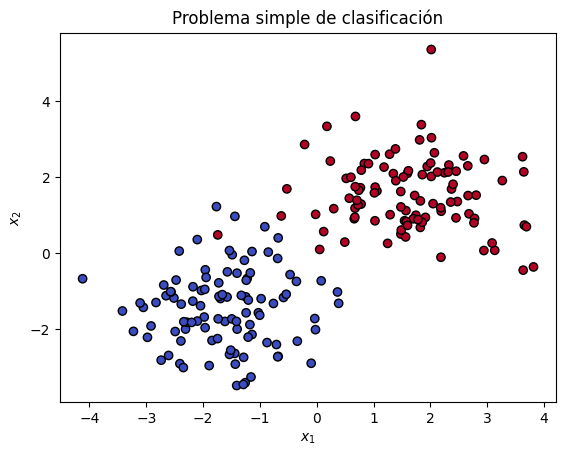

In [8]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(
    n_samples = 200, n_features = 2, 
    centers = [[-1.5,-1.5], [1.5,1.5]], random_state = 42
)

plt.scatter(
    x=X.T[0],
    y=X.T[1],
    c=y,
    cmap=plt.cm.coolwarm, 
    edgecolors='k'
)

plt.title("Problema simple de clasificación")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")



El clasificador lineal que queremos entrenar, $h(\mathbf{x})$,  toma la siguiente forma:

$$
\begin{equation}
h_\mathbf{w}(\mathbf{x}) = w_1 x_1 + w_2 x_2,
\end{equation}
$$

el cual toma datos de entrenamiento $\mathbf{x} = [x_1, x_2]^T$. El clasificador lineal es parametrizado por pesos $\mathbf{w} = [w_1, w_2]^T$, los cuales tenemos que aprender usando los datos de entrenamiento. Con el objetivo de entrenar al clasificador, necesitamos definir una función de pérdida.

Para este problema, usamos una **pérdida cuadrática** (**squared loss**) para el clasificador $h_\mathbf{w}(\mathbf{x})$ sobre el conjunto de entrenamiento de $n$ muestras $\mathbf{x}_i = [x_1^i, x_2^i]^T$, $i=1, ..., n$, con sus respectivas etiquetas $y_i$.

$$
\begin{equation}
f_{loss}(w_1, w_2) = \frac{1}{2} \sum_{i=1}^n \left( y_i - h_\mathbf{w}(\mathbf{x}_i) \right)^2 = \frac{1}{2} \sum_{i=1}^n \left( y_i - w_1 x_1^i - w_2 x_2^i \right)^2 = \frac{1}{2} (\mathbf{y} - X\mathbf{w})^T (\mathbf{y} - X\mathbf{w}).
\end{equation}
$$

Podemos calcular el gradiente de esta función de pérdida con respecto a $w_1$ y $w_2$.

$$
\begin{equation}
g(w_1, w_2) = \left[ \begin{array}{c} 
    \frac{\partial f_{loss}(w_1, w_2)}{\partial w_1} \\ 
    \frac{\partial f_{loss}(w_1, w_2)}{\partial w_2} 
    \end{array} \right] 
    = \left[ \begin{array}{c} 
    - \sum_{i=1}^n \left( y_i - w_1 x_1 - w_2 x_2 \right) x_1\\ 
    - \sum_{i=1}^n \left( y_i - w_1 x_1 - w_2 x_2 \right) x_2 \end{array} \right]
    = -X^T (\mathbf{y} - X\mathbf{w})
\end{equation}
$$

En las dos ecuaciones anteriores, las expresiones del extremo derecho son las versiones vectorizadas de la función de pérdida, donde $X$ es la matriz de datos y $\mathbf{y}$ es el vector de etiquetas. La versión vectorizada es más compacta, más fácil y más eficiente de implementar ya que evita el ciclo for para la suma.

Definimos las funciones de pérdida y su gradiente en Python:

In [9]:
## Definimos la función de pérdida
def squared_loss(w, X, y):
    return 0.5 * np.sum((y - np.dot(X, w))**2)

## Definimos el gradiente de la función de pérdida
def squared_loss_gradient(w, X, y):
    return -np.dot(X.T, (y - np.dot(X, w)))



Utilizamos algún método de primer orden para obtener los pesos que minimizan la función de perdida, $\mathbf{w}^* = [w_1^*, w_2^*]^T$. Iniciamos la búsqueda en el punto $\mathbf{w} = [0.0, -0.99]^T$.

In [10]:

## Probamos la clase Adam
optim_momentum_nesterov = MomentumNesterov(
                        f = squared_loss,          # Función a minimizar
                        df = squared_loss_gradient,         # Derivada de la función a minimizar
                        rho = 0.0002,  # Tasa de aprendizaje
                        x = np.array([0.0, -0.99]), # Punto inicial
                        maxiter = 800,    # Iteraciones máximas
                        m = np.zeros(2), # Inicialmente el momentum es igual a un arreglo igual a 0
                        beta = 0.9,      # Factor de inercia
                        args = (X,y)

                        )

w = optim_momentum_nesterov.optimiza() 
w

array([0.13534703, 0.13939918])

Visualizamos la frontera de decisión de nuestro clasificador.

Text(0, 0.5, '$x_2$')

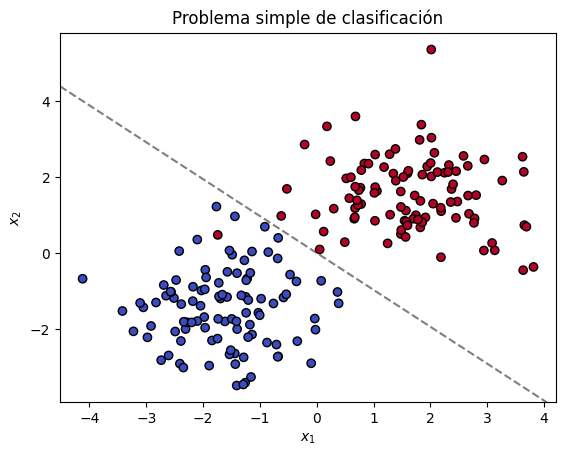

In [11]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx1, xx2 = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                   np.linspace(ylim[0], ylim[1], 50))

Z = w[0]*xx1.ravel() + w[1]*xx2.ravel()
Z = Z.reshape(xx1.shape)
ax.contour(xx1, xx2, Z, colors='k', levels=[0], alpha=0.5,
              linestyles=['--'])

plt.title("Problema simple de clasificación")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

Dado que nuestro clasificador lineal $h_\mathbf{w}(\mathbf{x}) = w_1 x_1 + w_2 x_2,$ regresa valores de predicción reales, necesitamos convertirlos a 0 y 1. Para ello, asignamos la etiqueta $y_{pred} = 1$ a todas las predicciones positivas, mientras que para las predicciones negativas asignamos la etiqueta $y_{pred} = 0$.

In [12]:
ypred = (np.dot(X, w) >=0).astype(int)
from sklearn.metrics import accuracy_score
accuracy_score(y, ypred)

0.995

### Ejercicio : Entrenamiento de un clasificador pseudo-lineal

Considera un problema de clasificación simple en espacio de características de 2 dimensiones.


Text(0, 0.5, '$x_2$')

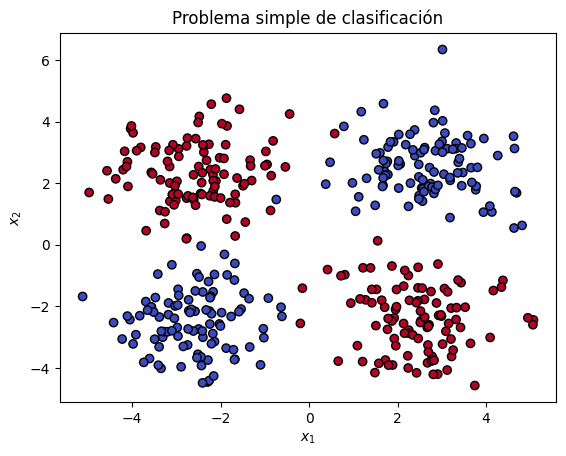

In [13]:
## Generamos datos sintéticos
X, y = make_blobs(
    n_samples = 400, n_features = 4, 
    centers = [[-2.5,-2.5], [2.5,2.5], [-2.5,2.5], [2.5,-2.5]], random_state = 42
)

## Ajustamos etiquetas
y[y==3]=2
y[y==0]=1

y = y -1

## Graficamos 
plt.scatter(
    x=X.T[0],
    y=X.T[1],
    c=y,
    cmap=plt.cm.coolwarm, 
    edgecolors='k'
)

plt.title("Problema simple de clasificación")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

¿Es adecuado usar el clasificador lineal que usamos en el problema anterior, $h(\mathbf{x})$?

$$
\begin{equation}
h_\mathbf{w}(\mathbf{x}) = w_1 x_1 + w_2 x_2,
\end{equation}
$$

Visita el siguiente sitio:
* https://playground.tensorflow.org/

Entrena un clasificador lineal, $h(\mathbf{x})$,  toma la siguiente forma:

$$
\begin{equation}
h_\mathbf{w}(\mathbf{x}) = w_1 x_1 + w_2 x_2 + w_3x_1x_2
\end{equation}
$$

La función de **pérdida cuadrática** (**squared loss**) para el clasificador $h_\mathbf{w}(\mathbf{x})$ sobre el conjunto de entrenamiento de $n$ muestras $\mathbf{x}_i = [x_1^i, x_2^i]^T$, $i=1, ..., n$, con sus respectivas etiquetas $y_i$.

$$
\begin{equation}
f_{loss}(w_1, w_2) = \frac{1}{2} \sum_{i=1}^n \left( y_i - h_\mathbf{w}(\mathbf{x}_i) \right)^2 = \frac{1}{2} \sum_{i=1}^n \left( y_i - w_1 x_1^i - w_2 x_2^i - w_3 x_1^i x_2^i \right)^2 .
\end{equation}
$$

Podemos calcular el gradiente de esta función de pérdida con respecto a $w_1$, $w_2$ y $w_3$.

$$
\begin{equation}
g(w_1, w_2, w_3) = \left[ \begin{array}{c} 
    \frac{\partial f_{loss}(w_1, w_2, w_3)}{\partial w_1} \\ 
    \frac{\partial f_{loss}(w_1, w_2, w_3)}{\partial w_2} \\
    \frac{\partial f_{loss}(w_1, w_2, w_3)}{\partial w_3} 
    \end{array} \right] 
    = \left[ \begin{array}{c} 
    - \sum_{i=1}^n \left( y_i - w_1 x_1 - w_2 x_2 - w_3 x_1 x_2 \right) x_1\\ 
    - \sum_{i=1}^n \left( y_i - w_1 x_1 - w_2 x_2 - w_3 x_1 x_2\right) x_2 \\
    - \sum_{i=1}^n \left( y_i - w_1 x_1 - w_2 x_2 - w_3 x_1 x_2\right) x_1x_2 \end{array} \right]
\end{equation}
$$


In [14]:
## Definimos la función de pérdida
def squared_loss(w, X, y):
    return 0.5 * np.sum((y - w[0]*X[:, 0] - w[1]*X[:, 1] - w[2]*X[:, 0]*X[:, 1]  )**2)

## Definimos el gradiente de la función de pérdida
def squared_loss_gradient(w, X, y):
    return np.array(
        [
             -np.sum((y - w[0]*X[:, 0] - w[1]*X[:, 1] - w[2]*X[:, 0]*X[:, 1]  )*X[:, 0]),
             -np.sum((y - w[0]*X[:, 0] - w[1]*X[:, 1] - w[2]*X[:, 0]*X[:, 1]  )*X[:, 1]),
             -np.sum((y - w[0]*X[:, 0] - w[1]*X[:, 1] - w[2]*X[:, 0]*X[:, 1]  )*X[:, 0]*X[:, 1]),

        ]
    )

Utilizamos algún método de primer orden para obtener los pesos que minimizan la función de perdida, $\mathbf{w}^* = [w_1^*, w_2^*, w_3^*]^T$. Iniciamos la búsqueda en el punto $\mathbf{w} = [0.0, -0.99, -0.99]^T$.

In [15]:
## Probamos la clase Adam
optim_momentum_nesterov = MomentumNesterov(
                        f = squared_loss,          # Función a minimizar
                        df = squared_loss_gradient,         # Derivada de la función a minimizar
                        rho = 0.000002,  # Tasa de aprendizaje
                        x = np.array([0.0, -0.99, -0.99]), # Punto inicial
                        maxiter = 500,    # Iteraciones máximas
                        m = np.zeros(3), # Inicialmente el momentum es igual a un arreglo igual a 0
                        beta = 0.9,      # Factor de inercia
                        args = (X,y)
                        )

w = optim_momentum_nesterov.optimiza() 
w

array([-0.0012962 ,  0.0019051 , -0.05834733])

Text(0, 0.5, '$x_2$')

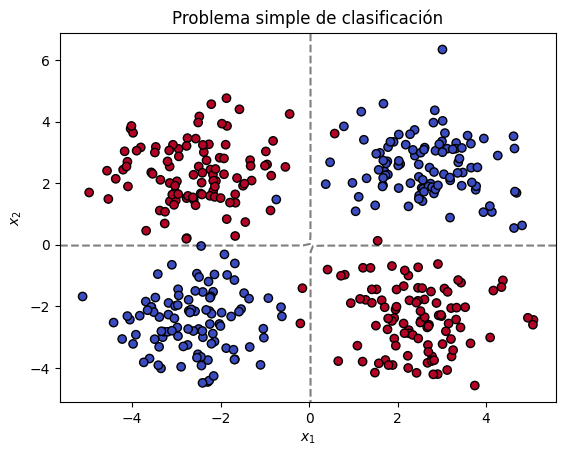

In [16]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx1, xx2 = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                   np.linspace(ylim[0], ylim[1], 50))

Z = w[0]*xx1.ravel() + w[1]*xx2.ravel() + w[2]*xx1.ravel()*xx2.ravel()
Z = Z.reshape(xx1.shape)
ax.contour(xx1, xx2, Z, colors='k', levels=[0], alpha=0.5,
              linestyles=['--'])

plt.title("Problema simple de clasificación")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

Dado que nuestro clasificador lineal $h_\mathbf{w}(\mathbf{x}) = w_1 x_1 + w_2 x_2+ w_3x_1x_2,$ regresa valores de predicción reales, necesitamos convertirlos a 0 y 1. Para ello, asignamos la etiqueta $y_{pred} = 1$ a todas las predicciones positivas, mientras que para las predicciones negativas asignamos la etiqueta $y_{pred} = 0$.

In [17]:
ypred = (w[0]*X[:,0] + w[1]*X[:,1] + w[2]*X[:,0]*X[:,1] >=0).astype(int)
from sklearn.metrics import accuracy_score
accuracy_score(y, ypred)

0.985